### 단순 선형 회귀 모델 구현

#### 패키지 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import ols

#### 데이터 준비

In [2]:
df = pd.read_excel('http://itpaper.co.kr/data/cars.xlsx', engine='openpyxl')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 데이터 전처리

In [3]:
# 결측치 값 확인

df.isna().sum()

speed    0
dist     0
dtype: int64

#### EDA

In [4]:
# 기본 통계 확인

df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


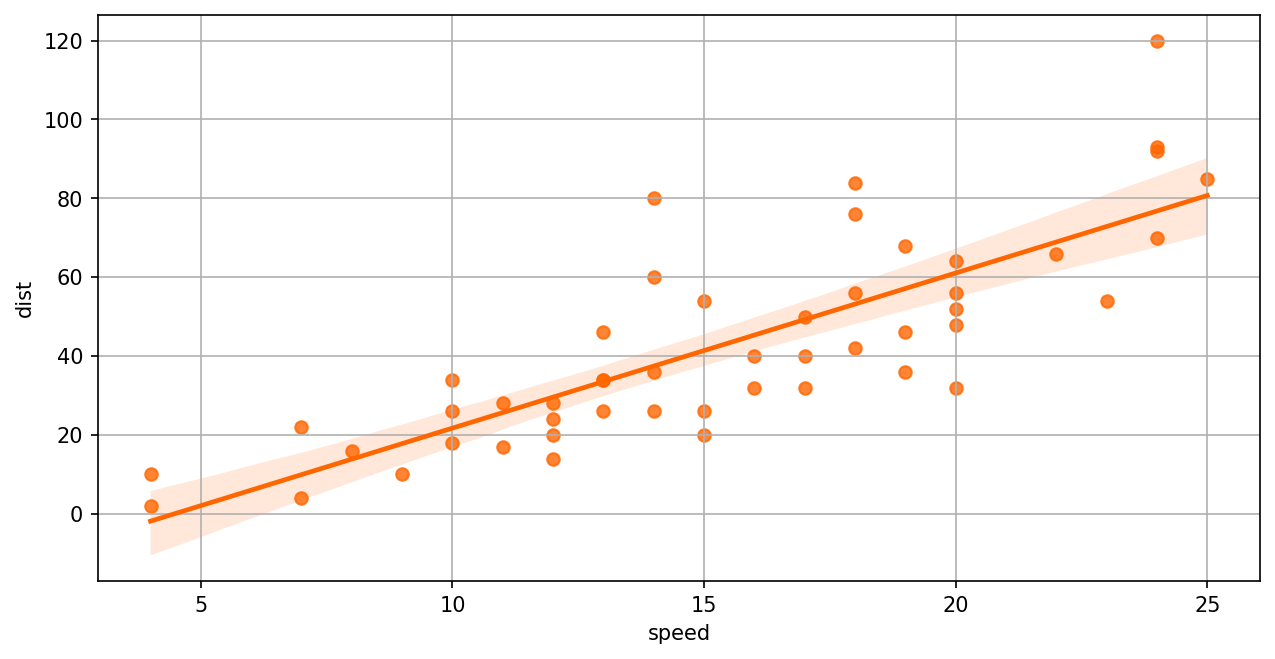

In [5]:
# 산점도 그래프와 추세선 확인

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
sns.regplot(data=df, x='speed', y='dist', color='#ff6600', ax=ax)
ax.grid()
plt.show()
plt.close()

#### 데이터셋 분할

In [6]:
# 랜덤시드 고정

np.random.seed(777)

In [7]:
# 훈련 데이터(독립변수)와 레이블(종속변수) 구분

x_train_set = df.filter(['speed'])
y_train_set = df.filter(['dist'])
print("훈련데이터 크기:", x_train_set.shape, "/ 레이블 크기:", y_train_set.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50, 1)


In [8]:
# 훈련데이터와 검증 데이터로 분할

# 독립변수인 `speed`를 훈련용 독립변수 `x_train`과 검정용 독립변수 `x_test`로 나눈다.
# 종속변수인 `dist`를 훈련용 종속변수 `y_train`과 검정용 종속변수 `y_test`로 나눈다.
# 훈련용 데이터셋과 검정용 데이터셋은 일반적으로 7:3의 비율로 한다.

x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, 
                                        test_size = 0.33, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 33, 검증용 데이터셋 크기: 17


#### 모델 개발

In [9]:
# 모델 정의

model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습 시키기

result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

# 학습결과
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/300
2/2 [==============================] - 1s 189ms/step - loss: 2909.0225 - mae: 46.3968 - val_loss: 1828.7968 - val_mae: 37.5893
Epoch 2/300
2/2 [==============================] - 0s 34ms/step - loss: 2882.7581 - mae: 46.1520 - val_loss: 1811.2354 - val_mae: 37.3802
Epoch 3/300
2/2 [==============================] - 0s 35ms/step - loss: 2856.9314 - mae: 45.9104 - val_loss: 1793.3961 - val_mae: 37.1667
Epoch 4/300
2/2 [==============================] - 0s 31ms/step - loss: 2829.9260 - mae: 45.6605 - val_loss: 1775.6329 - val_mae: 36.9528
Epoch 5/300
2/2 [==============================] - 0s 28ms/step - loss: 2804.5674 - mae: 45.4152 - val_loss: 1758.5509 - val_mae: 36.7460
Epoch 6/300
2/2 [==============================] - 0s 31ms/step - loss: 2779.0229 - mae: 45.1747 - val_loss: 1741.5277 - val_mae: 36.5387
Epoch 7/300
2/2 [==============================] - 0s 27ms/step - loss: 2754.3306 - mae: 44.9363 - val_loss: 1724.6917 - val_mae: 36.3326
Epoch 8/300
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2909.022461,46.396767,1828.796753,37.589264
2,2882.758057,46.151958,1811.235352,37.380203
3,2856.931396,45.910381,1793.396118,37.166656
4,2829.926025,45.660530,1775.632935,36.952797
5,2804.567383,45.415165,1758.550903,36.745972
...,...,...,...,...
296,284.631744,13.357475,233.119995,12.575321
297,284.597656,13.362214,233.440811,12.594499
298,284.592651,13.372042,233.611725,12.604676


#### 학습 결과 평가

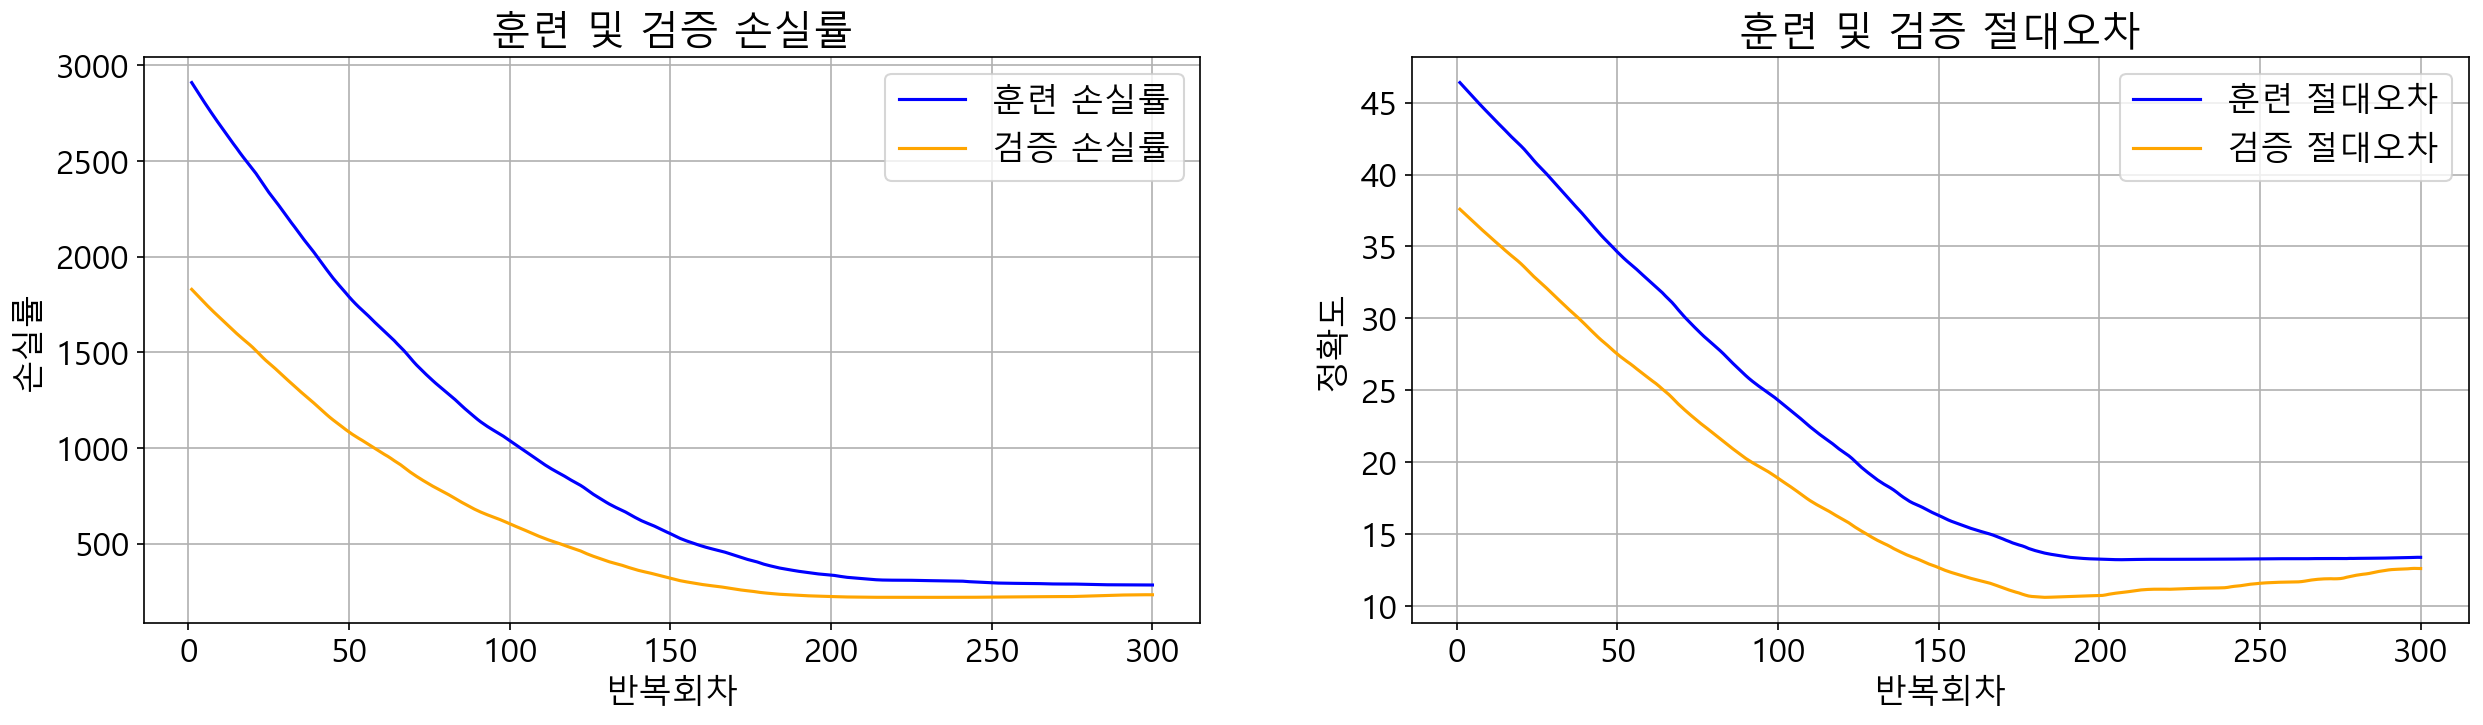

In [11]:
# 학습 결과 시각화

# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', 
             label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', 
             label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', 
             label = '훈련 절대오차', ax=ax2)
sns.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', 
             label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()


In [12]:
# 모델 성능 평가

evaluate = model.evaluate(x_test, y_test)
print("최종 손실률: %f, 최종 절대오차: %f" % (evaluate[0], evaluate[1]))

1/1 [==============================] - 0s 28ms/step - loss: 233.4435 - mae: 12.5951
최종 손실률: 233.443481, 최종 절대오차: 12.595055


#### 학습 결과 적용

In [13]:
# 테스트 데이터에 대한 예측 결과 산정

results = model.predict(x_test)
print(results)

[[67.44168 ]
 [38.955673]
 [36.10707 ]
 [33.258472]
 [56.04728 ]
 [41.804276]
 [41.804276]
 [53.198677]
 [36.10707 ]
 [56.04728 ]
 [41.804276]
 [58.895878]
 [21.864065]
 [38.955673]
 [13.318263]
 [30.409868]
 [38.955673]]


In [15]:
# 결과 데이터 셋 구성

kdf = pd.DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test['dist'],
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,67.441681,-13.441681
17,13,34,38.955673,-4.955673
11,12,14,36.107071,-22.107071
9,11,17,33.258472,-16.258472
36,19,46,56.047279,-10.047279
21,14,60,41.804276,18.195724
22,14,80,41.804276,38.195724
31,18,42,53.198677,-11.198677
12,12,20,36.107071,-16.107071
37,19,68,56.047279,11.952721


Text(22, 0, '예측오차: -4.116')

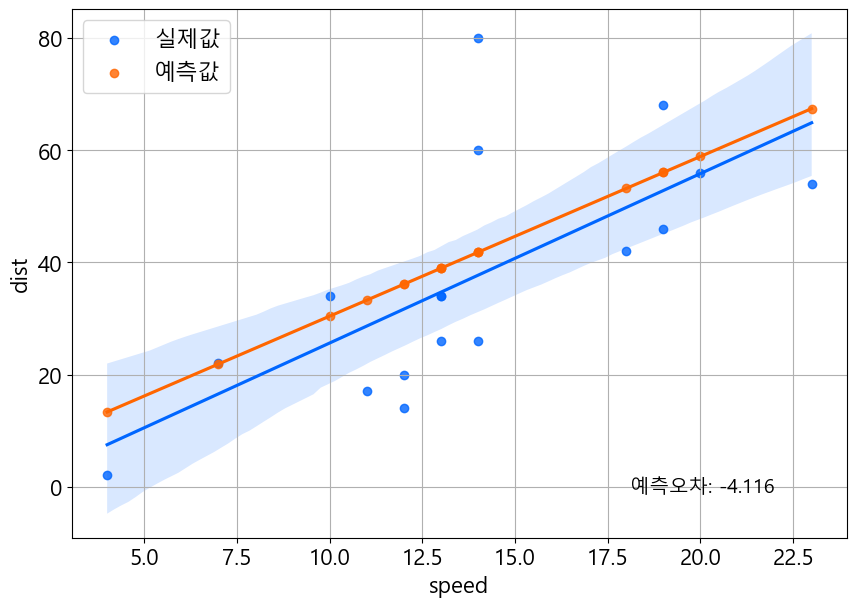

In [17]:
# 실제 결과값과 머신러닝에 의한 에측값 비교

fig, ax1 = plt.subplots(1, 1, figsize=(10, 7), dpi=100)

sns.regplot(x='검증데이터', y='실제값', data=kdf, label='실제값', color='#0066ff', 
            ax=ax1)
sns.regplot(x='검증데이터', y='예측값', data=kdf, label='예측값', color='#ff6600', 
            ax=ax1)
ax1.set_xlabel('speed')
ax1.set_ylabel('dist')
ax1.legend(loc='upper left')
ax1.grid()

ax1.text(x=22, y=0, s='예측오차: %0.3f' % kdf['예측오차'].mean(), fontsize=14, 
         horizontalalignment='right', verticalalignment='center')

In [19]:
# 훈련 데이터를 통계분석 기법으로 회귀분석 수행

train_df = pd.merge(x_train, y_train, left_index=True, right_index=True)
ols_model = ols('dist ~ speed', data=train_df)
fit = ols_model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     74.61
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           9.37e-10
Time:                        11:07:52   Log-Likelihood:                -135.79
No. Observations:                  33   AIC:                             275.6
Df Residuals:                      31   BIC:                             278.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.7239      8.487     -2.795      0.0

In [20]:
# 예측 결과 산정

test_df = pd.merge(x_test, y_test, left_index=True, right_index=True)
pred2 = fit.predict(test_df)
pred2

44    75.205778
17    32.192859
11    27.891567
9     23.590275
36    58.000611
21    36.494151
22    36.494151
31    53.699319
12    27.891567
37    58.000611
19    36.494151
41    62.301903
3      6.385107
16    32.192859
0     -6.518768
8     19.288983
15    32.192859
dtype: float64

In [21]:
# 결과 데이터 셋에 통계 예측값 추가하기

kdf['통계값'] = pred2
kdf['통계오차'] = kdf['실제값']-kdf['통계값']
kdf

,검증데이터,실제값,예측값,예측오차,통계값,통계오차
44,23,54,67.441681,-13.441681,75.205778,-21.205778
17,13,34,38.955673,-4.955673,32.192859,1.807141
11,12,14,36.107071,-22.107071,27.891567,-13.891567
9,11,17,33.258472,-16.258472,23.590275,-6.590275
36,19,46,56.047279,-10.047279,58.000611,-12.000611
21,14,60,41.804276,18.195724,36.494151,23.505849
22,14,80,41.804276,38.195724,36.494151,43.505849
31,18,42,53.198677,-11.198677,53.699319,-11.699319
12,12,20,36.107071,-16.107071,27.891567,-7.891567
37,19,68,56.047279,11.952721,58.000611,9.999389


Text(22, 0, '통계오차: 1.365')

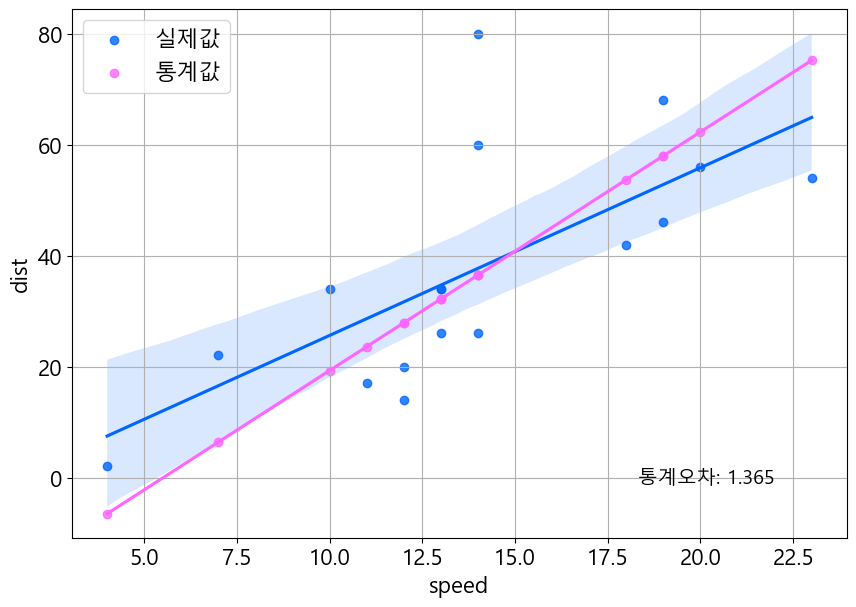

In [23]:
# 실제 결과값과 회귀분석에 의한 통계결과 비교

fig, ax2 = plt.subplots(1, 1, figsize=(10, 7), dpi=100)

sns.regplot(x='검증데이터', y='실제값', data=kdf, color='#0066ff', label='실제값', 
            ax=ax2)
sns.regplot(x='검증데이터', y='통계값', data=kdf, label='통계값', color='#ff66ff', 
            ax=ax2)
ax2.set_xlabel('speed')
ax2.set_ylabel('dist')
ax2.legend(loc='upper left')
ax2.grid()

ax2.text(x=22, y=0, s='통계오차: %0.3f' % kdf['통계오차'].mean(), fontsize=14, 
         horizontalalignment='right', verticalalignment='center')

Text(22, 0, '통계오차: 1.365')

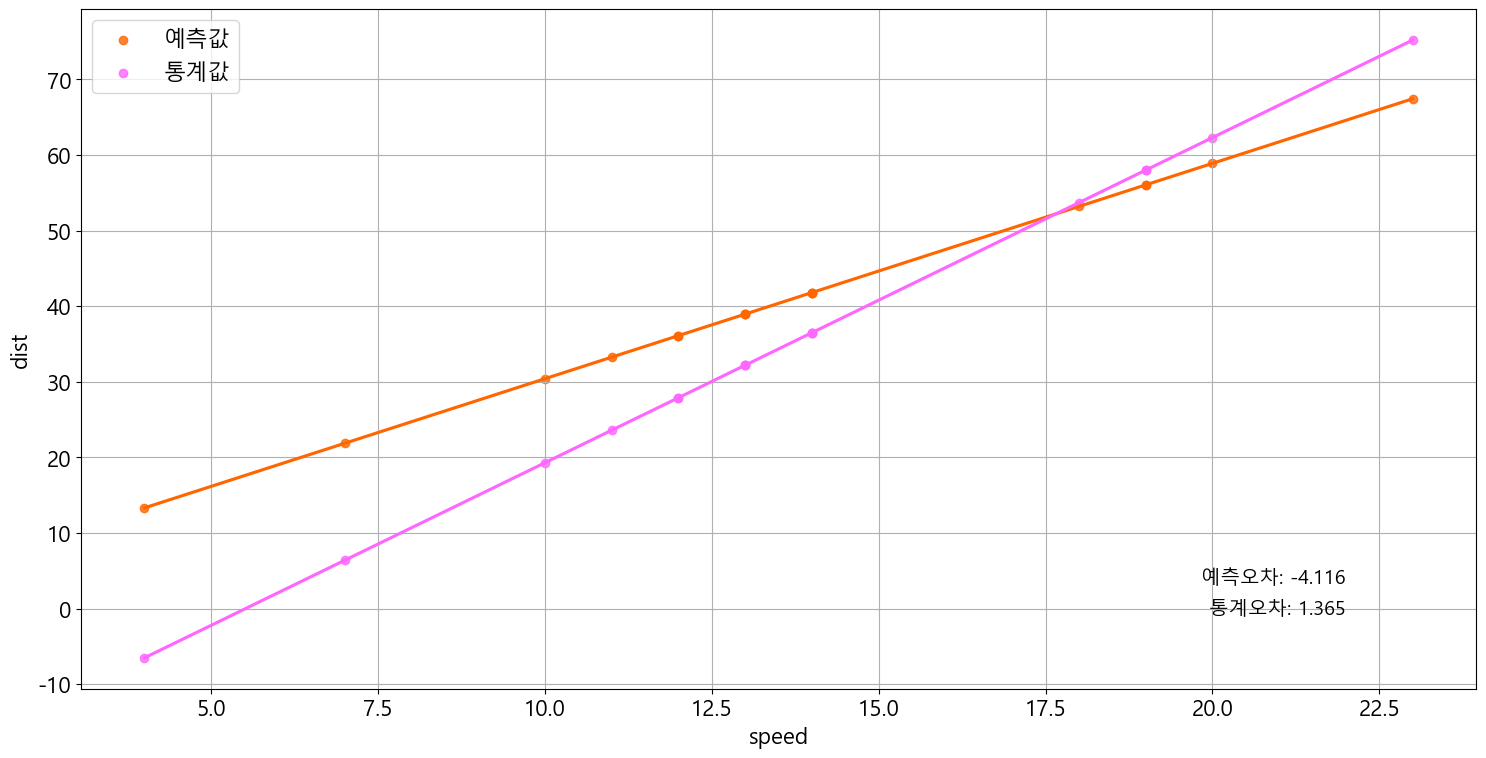

In [24]:
# 머신러닝에 의한 예측결과와 회귀분석에 의한 예측결과 비교

fig, ax3 = plt.subplots(1, 1, figsize=(18, 9), dpi=100)

sns.regplot(x='검증데이터', y='예측값', data=kdf, label='예측값', color='#ff6600', 
            ax=ax3)
sns.regplot(x='검증데이터', y='통계값', data=kdf, label='통계값', color='#ff66ff', 
            ax=ax3)
ax3.set_xlabel('speed')
ax3.set_ylabel('dist')
ax3.legend(loc='upper left')
ax3.grid()

ax3.text(x=22, y=4, s='예측오차: %0.3f' % kdf['예측오차'].mean(), fontsize=14, 
         horizontalalignment='right', verticalalignment='center')
ax3.text(x=22, y=0, s='통계오차: %0.3f' % kdf['통계오차'].mean(), fontsize=14, 
         horizontalalignment='right', verticalalignment='center')